# Modeling a Game

You are creating a fundraiser for your favorite school club. You will create a dart board that is a square of length 45 cm.

![](https://github.com/atitus/math-modeling/raw/master/unit-04/04-02-game/dartboard.png)

Inside the square, there are three circles. The purple circle has a diameter 45 cm (radius 22.5 cm). The blue circle has a diameter 27 cm (radius 13.5 cm). The red circle has a diameter 9 cm (radius 4.5 cm).

# Rules of the Game

A dart inside the red circle wins $\$10$.
A dart inside the blue circle (but not in the red circle) wins $\$5$.
A dart inside the purple circle (but not in the red nor blue circles) wins $\$1$.

For the fundraiser, you will sell "throws" for a certain price $P$. What should be the minimum price of a throw so that you will not lose money on your fundraiser? To answer this question with a Monte Carlo simulation, you should answer these questions:

1. What assumptions will you make for your model?
2. What will you randomize?
3. How will you know what circle a dart lands within?

Below is a working program for this game.

In [1]:
import random as rand #for random numbers
import numpy as np
import matplotlib.pyplot as plt

Percent in red = 4.00%
Percent in blue = 24.00%
Percent in purple = 48.00%
Percent not in a circle = 24.00%
Gross = $300.00
Loss = $208.00
Profit = $92.00 = 30.67% of gross


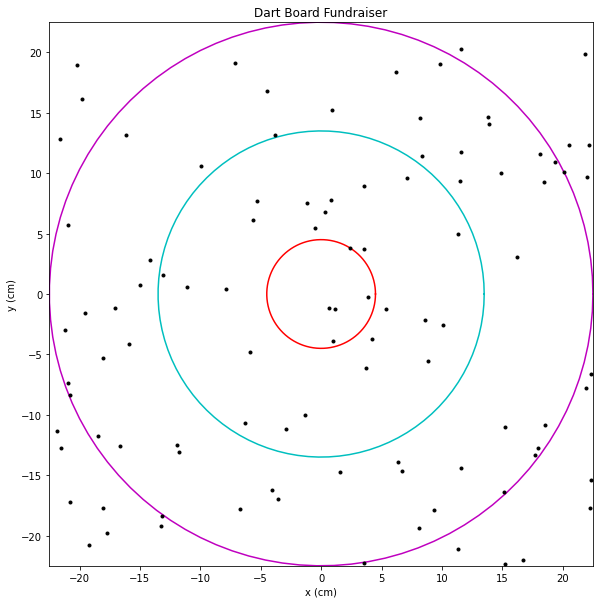

In [3]:
L = 45
Rpurple = 45/2
Rblue = 27/2
Rred = 9/2

Mpurple = 1
Mblue = 5
Mred = 10
P = 3
Ntosses = 100

Npurple = 0
Nblue = 0
Nred = 0

xmodel = []
ymodel = []

for i in range(1,Ntosses+1):
    
    x = rand.uniform(-L/2,L/2)
    y = rand.uniform(-L/2,L/2)
    xmodel.append(x)
    ymodel.append(y)
    
    r = np.sqrt(x**2+y**2)
    if r<Rpurple and r>Rblue:
        Npurple = Npurple + 1
    elif r<Rblue and r>Rred:
        Nblue = Nblue + 1
    elif r<Rred:
        Nred = Nred + 1

gross = P*Ntosses
loss = Mpurple*Npurple + Mblue*Nblue + Mred*Nred

        
print("Percent in red = {:.2f}%".format(Nred/Ntosses*100))
print("Percent in blue = {:.2f}%".format(Nblue/Ntosses*100))
print("Percent in purple = {:.2f}%".format(Npurple/Ntosses*100))
print("Percent not in a circle = {:.2f}%".format((Ntosses-Npurple-Nblue-Nred)/Ntosses*100))
print("Gross = ${:.2f}".format(gross))
print("Loss = ${:.2f}".format(loss))
print("Profit = ${:.2f} = {:.2f}% of gross".format(gross-loss, (gross-loss)/gross*100))


#red circle
theta = np.linspace(0,2*np.pi,100)
xred = Rred*np.cos(theta)
yred = Rred*np.sin(theta)
#blue circle
xblue = Rblue*np.cos(theta)
yblue = Rblue*np.sin(theta)
#purple circle
xpurple = Rpurple*np.cos(theta)
ypurple = Rpurple*np.sin(theta)

#graph
plt.figure(figsize=(10,10))
plt.title("Dart Board Fundraiser")
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.plot(xred, yred, 'r-')
plt.plot(xblue, yblue, 'c-')
plt.plot(xpurple, ypurple, 'm-')
plt.plot(xmodel,ymodel, 'k.')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Exercise 1: Extending your Game

1. What analytical questions can you ask about this fundraiser and how would you go about answering them?

2. How can you change your game?